In [5]:
#import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#read in and check post cleaned data
df = pd.read_csv('salary_data_cleaned.csv')

df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_txt,job_city,job_state,same_location,age_company,python_yn,R_yn,tableau_yn,excel_yn,SAS_yn
0,Business Analyst,$51K-$97K (Glassdoor est.),Intellinet is seeking a full time Business Ana...,4.5,Intellinet\r\n4.5,"Atlanta, GA","Atlanta, GA",51 to 200 employees,1993,Company - Private,...,Intellinet\r\n,Atlanta,GA,1,27,0,1,0,1,0
1,"Sr. Business Analyst, Operations Analytics",$51K-$97K (Glassdoor est.),Customer Experience Opportunity in Financial S...,3.4,Advisor Group\r\n3.4,"Atlanta, GA","Phoenix, AZ",1001 to 5000 employees,2016,Company - Private,...,Advisor Group\r\n,Atlanta,GA,0,4,0,1,0,1,0
2,Support Analyst,$51K-$97K (Glassdoor est.),"Support Analyst\r\nBoston, MA\r\n\r\nWe will a...",4.1,FinancialForce\r\n4.1,"Atlanta, GA","San Francisco, CA",501 to 1000 employees,2009,Company - Private,...,FinancialForce\r\n,Atlanta,GA,0,11,0,1,0,1,0
3,Senior Business Analyst,$51K-$97K (Glassdoor est.),BASIC PURPOSE: Provides strategic consulting s...,3.8,FHLBank Atlanta\r\n3.8,"Atlanta, GA","Atlanta, GA",201 to 500 employees,1932,Company - Private,...,FHLBank Atlanta\r\n,Atlanta,GA,1,88,0,1,0,1,0
4,Business Intelligence (BI) Analyst,$51K-$97K (Glassdoor est.),MRI Software is seeking a Business Intelligenc...,3.4,MRI Software\r\n3.4,"Atlanta, GA","Solon, OH",1001 to 5000 employees,1971,Company - Private,...,MRI Software\r\n,Atlanta,GA,0,49,0,1,0,0,0


In [6]:
#check data dimensions
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_city',
       'job_state', 'same_location', 'age_company', 'python_yn', 'R_yn',
       'tableau_yn', 'excel_yn', 'SAS_yn'],
      dtype='object')

In [7]:
#Second iteration of data clean and feature engineering | List of tasks below


# determine job description length
# competitor count
# remove extra characters off company name

In [8]:
df['Job Title'].value_counts()

Business Analyst                              71
Senior Business Analyst                       20
Systems Analyst                                8
Sr. Business Analyst                           7
Business Analyst-Lenses                        7
                                              ..
SW Business Analyst / System Product Owner     1
Immigration Analyst (Assistant Paralegal)      1
Business Analyst 3                             1
Insy004 - Senior Business Systems Analyst      1
Senior Consultant - Professional Services      1
Name: Job Title, Length: 283, dtype: int64

In [9]:
#Create function to simply diverse titles into few levels of interest
def title_simplifier(title):
    if 'it' in title.lower() or 'salesforce' in title.lower() or 'online' in title.lower() or 'saas' in title.lower() or 'software' in title.lower():
        return 'IT Analyst'
    elif 'supply' in title.lower():
        return 'Supply Chain Analyst'
    elif 'operations' in title.lower() or 'process' in title.lower():
        return 'Operations Analyst'
    elif 'manager' in title.lower():
        return 'Manager'
    elif 'director' in title.lower():
        return 'Director'
    elif 'data' in title.lower():
        return 'Data Analyst'
    elif 'consultant' in title.lower():
        return 'Consultant'
    elif 'business analyst' in title.lower():
        return 'Business Analyst'
    else:
        return 'Na'
    
#Create function to capture the seniority of job
def seniority(title):
    if 'jr' in title.lower() or 'junior' in title.lower() or 'entry' in title.lower() or 'trainee' in title.lower():
        return 'Junior'
    elif 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'director' in title.lower() or 'manager' in title.lower():
        return 'Senior'
    elif 'intern' in title.lower() or 'internship' in title.lower():
        return 'Intern'
    else:
        return 'Na'

In [10]:
#create and check the count of simplified titles. titles of interest feature
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

Business Analyst        235
Na                      132
IT Analyst               53
Operations Analyst       23
Data Analyst             23
Manager                  12
Consultant               11
Supply Chain Analyst      6
Director                  5
Name: job_simp, dtype: int64

In [11]:
#create and check count of seniority feature
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

Na        337
Senior    133
Junior     26
Intern      4
Name: seniority, dtype: int64

In [12]:
#create a description length feature
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df.desc_len

0      2381
1      8103
2      6111
3      4373
4      1958
       ... 
495    3027
496    6021
497    2836
498    2651
499    1757
Name: desc_len, Length: 500, dtype: int64

In [13]:
#competitor count
df['num_comp']=df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df.num_comp.value_counts()

0    394
3     62
2     37
1      7
Name: num_comp, dtype: int64

In [14]:
#clean company name
df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])

In [15]:
df['Company Name'].value_counts()

Staffigo Technical Services, LLC\r    36
Home Depot\r                          17
Avacend, Inc.\r                       16
Hunter Technical Resources\r           8
HD Supply\r                            8
                                      ..
IBM\r                                  1
Talend\r                               1
Streamline Health\r                    1
CharterUP\r                            1
Itamar Medical\r                       1
Name: Company Name, Length: 291, dtype: int64

In [16]:
#see best number of bins for job description length
df['desc_len'].value_counts(bins=5)

(84.925, 3918.8]      335
(3918.8, 7733.6]      157
(7733.6, 11548.4]       7
(15363.2, 19178.0]      1
(11548.4, 15363.2]      0
Name: desc_len, dtype: int64

In [17]:
#Beginning of Exploratory Analysis

In [18]:
df.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,same_location,age_company,python_yn,R_yn,tableau_yn,excel_yn,SAS_yn,desc_len,num_comp
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.0,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.496600,1416.720000,50.276000,94.604000,72.440000,0.304000,24.988000,0.04800,1.0,0.080000,0.616000,0.068000,3328.662000,0.534000
std,1.453283,898.929308,10.399043,19.635026,14.835045,0.460443,40.417062,0.21398,0.0,0.271565,0.486845,0.251998,1914.563298,1.069173
min,-1.000000,-1.000000,32.000000,61.000000,46.500000,0.000000,-1.000000,0.00000,1.0,0.000000,0.000000,0.000000,104.000000,0.000000
25%,3.300000,-1.000000,41.000000,76.000000,58.500000,0.000000,-1.000000,0.00000,1.0,0.000000,0.000000,0.000000,1985.000000,0.000000
50%,3.700000,1987.000000,51.000000,98.000000,74.000000,0.000000,13.000000,0.00000,1.0,0.000000,1.000000,0.000000,3172.000000,0.000000
75%,4.300000,2005.000000,56.000000,103.000000,80.000000,1.000000,27.000000,0.00000,1.0,0.000000,1.000000,0.000000,4465.750000,0.000000
max,5.000000,2019.000000,69.000000,128.000000,98.500000,1.000000,246.000000,1.00000,1.0,1.000000,1.000000,1.000000,19178.000000,3.000000


In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_city',
       'job_state', 'same_location', 'age_company', 'python_yn', 'R_yn',
       'tableau_yn', 'excel_yn', 'SAS_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

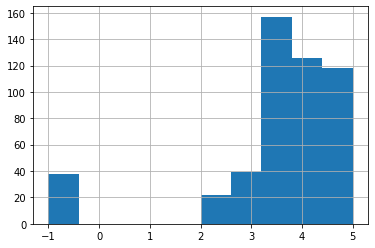

In [20]:
#1st look at interesting continuous variables via Histograms
df.Rating.hist()
#Somewhat normal with low sd. Includes the nulls on left as -1

In [21]:
print(1.45/3.496)
print(14.8/72)

0.41475972540045764
0.20555555555555557


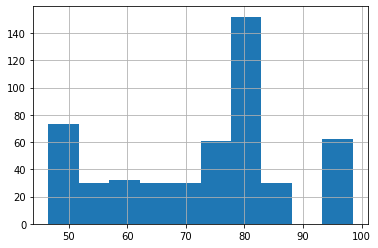

In [22]:
df.avg_salary.hist()
# salary somewhat normal with some dispersion and skew. Expected high standard deviation.

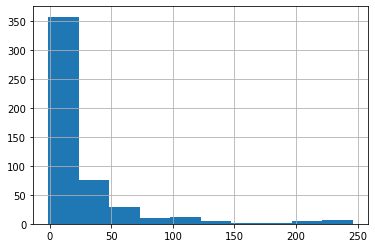

In [23]:
df.age_company.hist()
# age of company data appears to follow exponential distribution. Need to normalize for use in regression

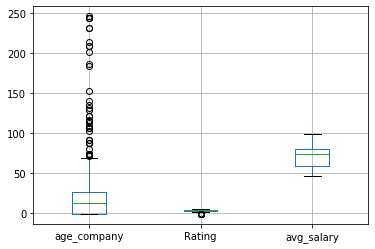

In [24]:
#2nd look at interesting continuous variables via Boxplots
df.boxplot(column = ['age_company','Rating','avg_salary'])

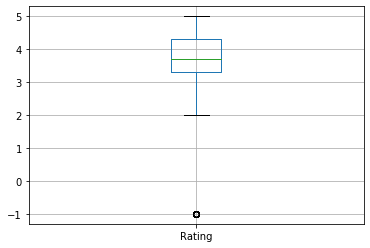

In [25]:
df.boxplot(column = 'Rating')

In [26]:
#3rd look at interesting continuous variables via Correlation Matrix
corr_select = df[['age_company','Rating','avg_salary','desc_len']].corr()
corr = df.corr()
print(corr) #see correlation between continuous variables

                 Rating   Founded  min_salary  max_salary  avg_salary  \
Rating         1.000000  0.490372    0.047190    0.034140    0.039133   
Founded        0.490372  1.000000    0.045543    0.029725    0.035634   
min_salary     0.047190  0.045543    1.000000    0.946786    0.977052   
max_salary     0.034140  0.029725    0.946786    1.000000    0.993617   
avg_salary     0.039133  0.035634    0.977052    0.993617    1.000000   
same_location  0.036288  0.128366    0.045640    0.061000    0.056365   
age_company    0.111603  0.369515    0.119576    0.106675    0.112506   
python_yn     -0.050384  0.020042    0.005742    0.042691    0.030265   
R_yn                NaN       NaN         NaN         NaN         NaN   
tableau_yn    -0.046533  0.005280   -0.024865    0.007081   -0.004029   
excel_yn       0.012880 -0.006011    0.037997    0.022844    0.028435   
SAS_yn        -0.046974 -0.029384    0.027237    0.034209    0.032185   
desc_len      -0.072440  0.122469   -0.009752    0.

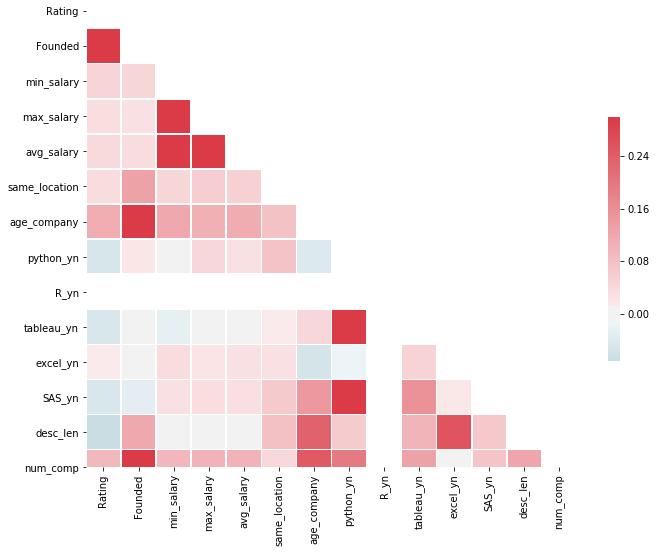

In [27]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
#1st look at interesting categorical variables via Barplots
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_city',
       'job_state', 'same_location', 'age_company', 'python_yn', 'R_yn',
       'tableau_yn', 'excel_yn', 'SAS_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [29]:
#select cat variables
df_dim = df[['job_simp', 'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_city','same_location','python_yn','tableau_yn','excel_yn','SAS_yn', 'seniority']]

Graph for job_simp: total = 9


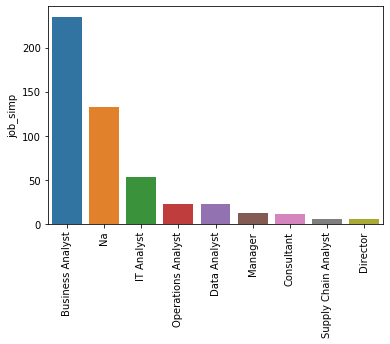

Graph for Company Name: total = 291


C:\Users\cumea\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cumea\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


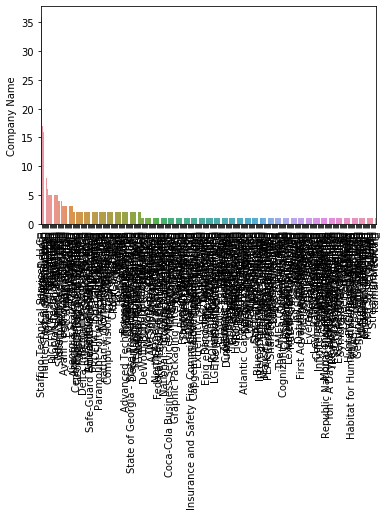

Graph for Location: total = 19


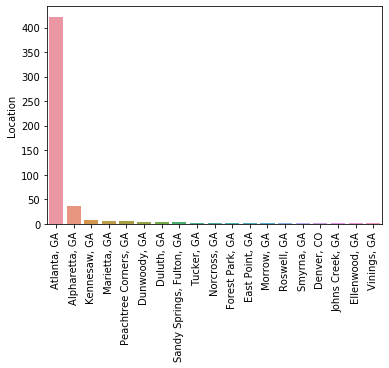

Graph for Headquarters: total = 144


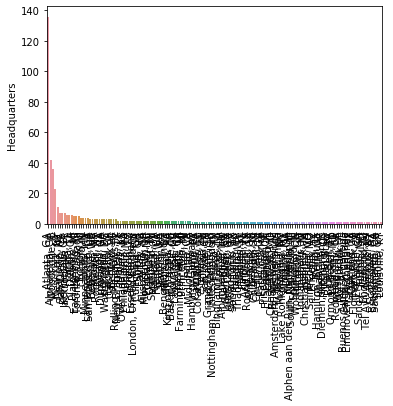

Graph for Size: total = 9


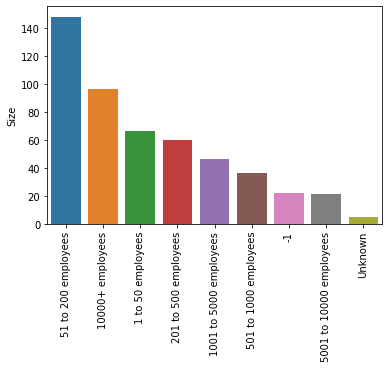

Graph for Type of ownership: total = 11


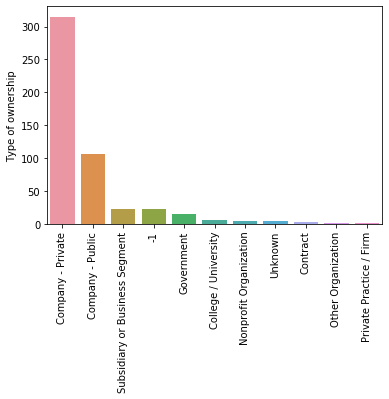

Graph for Industry: total = 49


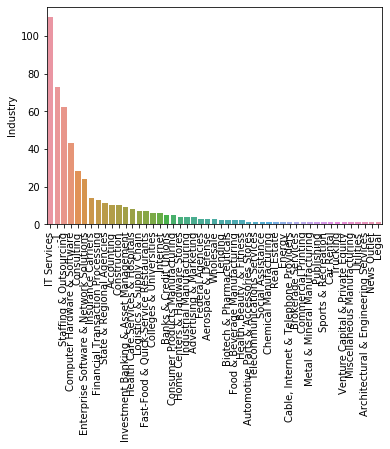

Graph for Sector: total = 24


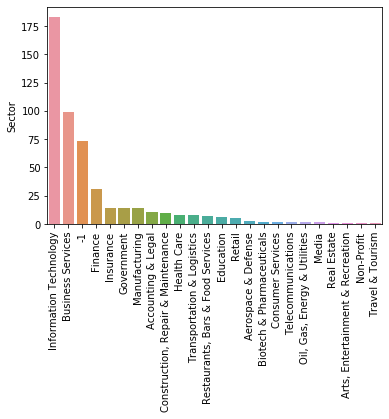

Graph for Revenue: total = 14


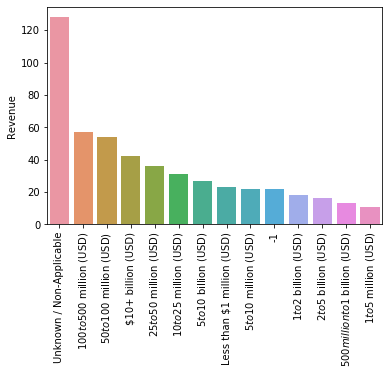

Graph for job_city: total = 19


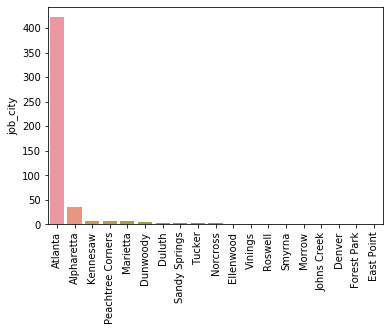

Graph for same_location: total = 2


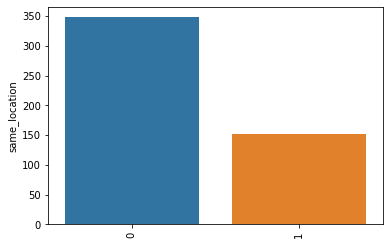

Graph for python_yn: total = 2


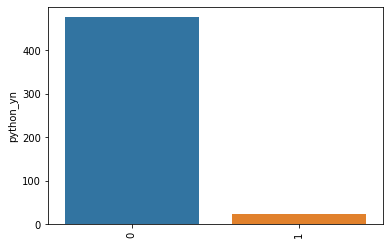

Graph for tableau_yn: total = 2


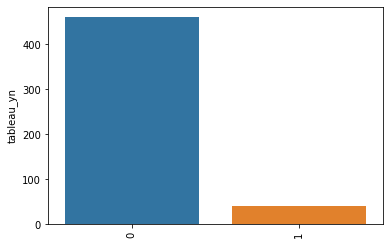

Graph for excel_yn: total = 2


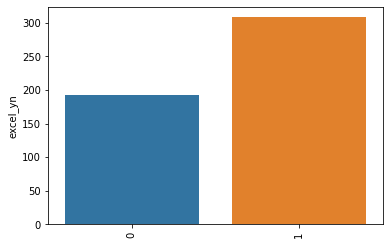

Graph for SAS_yn: total = 2


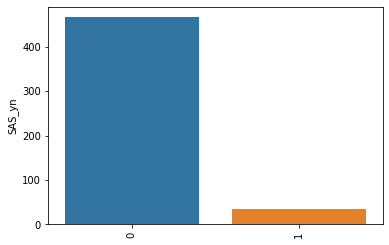

Graph for seniority: total = 4


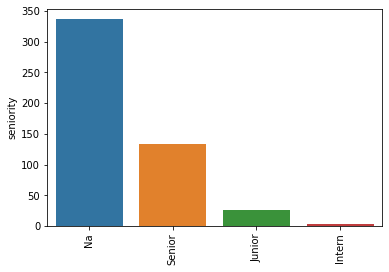

In [30]:
#loop through and explore barplots for each cat variables
for i in df_dim.columns:
    dim_val = df[i].value_counts()
    print('Graph for %s: total = %d' % (i, len(dim_val)))
    plot = sns.barplot(x=dim_val.index, y=dim_val)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plt.show()

Graph for job_simp: total = 9


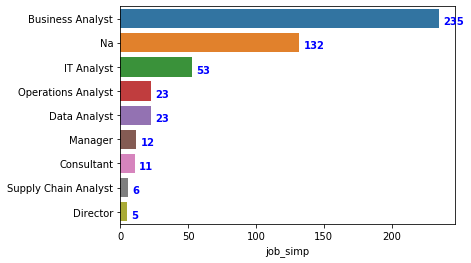

In [31]:
#Make and explore a more pronounced job_simp barplot
dim_val = df['job_simp'].value_counts()
print('Graph for %s: total = %d' % ('job_simp', len(dim_val)))
plot = sns.barplot(x=dim_val, y=dim_val.index)
for i, v in enumerate(dim_val):
    plot.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.show()

Graph for Location: total = 10


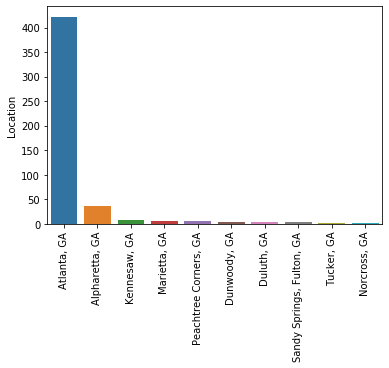

Graph for Headquarters: total = 10


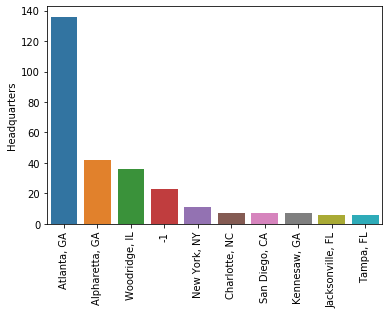

Graph for Industry: total = 10


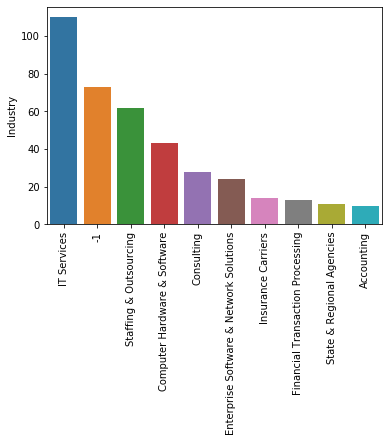

Graph for Company Name: total = 10


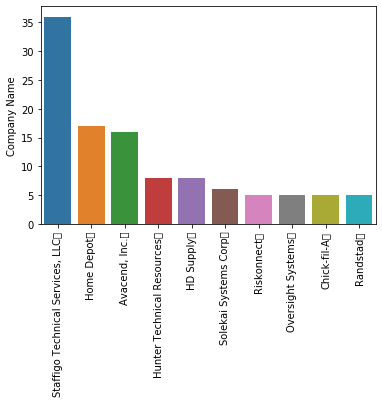

In [32]:
#Make and explore more pronounce bar charts for the following four factors
for i in df_dim[['Location', 'Headquarters','Industry','Company Name']].columns:
    dim_val = df[i].value_counts()[:10]
    print('Graph for %s: total = %d' % (i, len(dim_val)))
    plot = sns.barplot(x=dim_val.index, y=dim_val)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plt.show()

In [33]:
#Explore how features relate to target variables via pivot tables

In [34]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_city',
       'job_state', 'same_location', 'age_company', 'python_yn', 'R_yn',
       'tableau_yn', 'excel_yn', 'SAS_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [35]:
#pivot average salary by job title and seniority
df1 = df[df.seniority != 'Intern']
df2 = df1[df.seniority != 'Na']
df3 = df2[df.job_simp != 'Na']
pd.pivot_table(df3,index= ['seniority','job_simp'], values='avg_salary' )

C:\Users\cumea\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cumea\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


avg_salary
seniority job_simp                        
Junior    Business Analyst       68.454545
          Data Analyst           52.000000
          IT Analyst             74.000000
          Supply Chain Analyst   79.000000
Senior    Business Analyst       72.027778
          Consultant             83.375000
          Data Analyst           65.300000
          Director               78.700000
          IT Analyst             72.187500
          Manager                73.791667
          Operations Analyst     66.090909
          Supply Chain Analyst   51.500000

In [35]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [36]:
#pivot average salary by City location split job titles
pd.pivot_table(df,index= ['job_city','job_simp'], values='avg_salary', aggfunc='count').sort_values('job_city',ascending=True)

avg_salary
job_city          job_simp                        
Alpharetta        Business Analyst              25
                  Consultant                     1
                  IT Analyst                     1
                  Na                             7
                  Operations Analyst             1
                  Supply Chain Analyst           1
Atlanta           Supply Chain Analyst           5
                  Operations Analyst            22
                  Na                           113
                  Manager                       11
                  Data Analyst                  19
                  Director                       2
                  Consultant                     9
                  Business Analyst             192
                  IT Analyst                    49
Denver            Data Analyst                   1
Duluth            Business Analyst               1
                  Na                             2
Dunwoody          Na                             2
                  Business Analyst               2
East Point        Business Analyst               1
Ellenwood         Business Analyst               1
Forest Park       Data Analyst                   1
Johns Creek       Manager                        1
Kennesaw          Consultant                     1
                  IT Analyst                     2
                  Na                             4
Marietta          Director                       3
                  Business Analyst               3
Morrow            Na                             1
Norcross          Business Analyst               1
                  Data Analyst                   1
Peachtree Corners Business Analyst               4
                  Data Analyst                   1
                  Na                             1
Roswell           IT Analyst                     1
Sandy Springs     Business Analyst               3
Smyrna            Business Analyst               1
Tucker            Na                             2
Vinings           Business Analyst               1

In [37]:
#select features to loop pivot
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_city',
       'job_state', 'same_location', 'age_company', 'python_yn', 'R_yn',
       'tableau_yn', 'excel_yn', 'SAS_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [38]:
#select features for looped pivot: 'avg_salary','Rating', 'Company Name', 'Location', 'Size', 'Type of Ownership', 'Industry', 'Sector', 'num_comp', 'same_location', 'age_company', 'python_yn', 'R_yn', 'tableau_yn', 'excel_yn', 'SAS_yn', 'seniority', 'desc_len'

In [39]:
df_pivot = df[['Rating', 'Company Name', 'Location', 'Size', 'Type of ownership', 'Industry', 'Sector', 'num_comp', 'same_location', 'age_company', 'python_yn', 'R_yn', 'tableau_yn', 'excel_yn', 'SAS_yn', 'seniority', 'desc_len']]

In [40]:
for i in df_pivot.columns:
    print(i)
    print(pd.pivot_table(df,index= i, values='avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
 2.6     86.250000
 3.1     79.777778
 2.7     79.450000
 2.0     79.000000
 4.5     78.566667
 4.1     78.529412
 4.4     77.750000
 2.4     77.000000
 3.8     75.833333
 3.7     75.574074
 3.5     75.048387
 3.9     74.660714
 4.0     73.750000
 2.2     73.500000
 3.2     73.416667
 3.0     73.366667
 4.9     72.850000
 3.4     72.673913
 3.6     70.944444
 4.2     70.200000
 4.3     69.950000
 4.7     69.700000
 3.3     68.840909
 2.5     68.750000
 5.0     68.468750
-1.0     68.184211
 2.8     68.000000
 4.6     67.642857
 4.8     67.125000
Company Name
                                                    avg_salary
Company Name                                                  
IBM                                                  98.500000
Humana                                               98.500000
ASAP                                                 98.500000
Morehouse College                                    98.500000
LanceSoft Inc

0               71.887931
age_company
             avg_salary
age_company            
 59           98.500000
 153          98.500000
 109          98.500000
 35           95.000000
 32           95.000000
 214          95.000000
 184          95.000000
 135          95.000000
 34           86.500000
 92           86.500000
 129          86.500000
 27           84.500000
 49           84.500000
 122          82.750000
 36           82.250000
 46           81.500000
 69           80.250000
 24           80.200000
 41           80.000000
 38           80.000000
 246          80.000000
 115          80.000000
 29           79.666667
 244          79.666667
 7            79.100000
 60           79.000000
 80           79.000000
 113          79.000000
 45           79.000000
 132          79.000000
 187          79.000000
 91           79.000000
 44           79.000000
 10           78.464286
 19           78.375000
 39           78.000000
 201          78.000000
 8            77.333333
 4

In [41]:
#pivot average salary by revenue split by python
pd.pivot_table(df,index= 'Revenue',columns='python_yn', values='avg_salary', aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),18.0,NaN
$1 to $5 million (USD),11.0,NaN
$10 to $25 million (USD),31.0,NaN
$10+ billion (USD),35.0,7.0
$100 to $500 million (USD),54.0,3.0
$2 to $5 billion (USD),16.0,NaN
$25 to $50 million (USD),35.0,1.0
$5 to $10 billion (USD),27.0,NaN
$5 to $10 million (USD),21.0,1.0


In [37]:
#import wordcloud and natural language tool kit modules
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [38]:
#generate wordcloud
word = "".join(df['Job Description'])

def punct_stop(text):
    """remove punctations and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for i in word_tokens:
        if i not in stop_words and i.isalpha():
            filtered.append(i.lower())
    return filtered    
    
 

In [ ]:
words_filtered = punct_stop(word)   

text = "".join(words_filtered)

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=10, width=800, height=1500)
wc.generate(text)



In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [86]:
#export explored data as .csv file
df.to_csv('salary_data_explored.csv')